# Price Forecast With Monte Carlo Simulation
# Bozkurt Turan Yiğit, Çağkan Başer, Burakhan Pirimoğu

In this project, we will implement Monte Carlo simulations to predict future prices of three different commodities. Unlike many simulations we will try to predict rather small time points and at certain time points we will re-calculate the drift and variance for the Monte Carlo simulation 

In [1]:
#Necessary libraries
import quandl # to get data from quandl website
import pandas as pd #to work with data frames
import numpy as np #to algebric processes
import matplotlib.pyplot as plt #simple visualization

In [2]:
xpd = quandl.get("JOHNMATT/PALL", authtoken="VjcHFgsFd3LhdRsUP_ad", start_date="2010-01-01", end_date="2018-11-01")
xpl = quandl.get("JOHNMATT/PLAT", authtoken="VjcHFgsFd3LhdRsUP_ad", start_date="2010-01-01", end_date="2018-11-01")
wti = quandl.get("FRED/DCOILBRENTEU", authtoken="VjcHFgsFd3LhdRsUP_ad", start_date="2010-01-01", end_date="2018-11-01")

Thanks to "Quandl" api for Python, we obtained prices of 'Palladium', 'Platinium' and 'Brent Oil' commodities for dates between 01.01.2010 and 01.11.2018.

In our dataset there are 2246 time points for 3 commodities

In [3]:
df = pd.DataFrame()
df['xpd'] = xpd['London 09:00']
df['xpl'] = xpl['London 09:00']
df['oil'] = wti['Value']
print('Shape of our dataset is {}'.format(df.shape))
display(df.head(), df.tail())

Shape of our dataset is (2246, 3)


,xpd,xpl,oil
Date,,,
2010-01-04,418.0,1490.0,79.05
2010-01-05,426.0,1527.0,79.27
2010-01-06,424.0,1540.0,80.14
2010-01-07,425.0,1555.0,80.57
2010-01-08,426.0,1548.0,80.06


,xpd,xpl,oil
Date,,,
2018-10-26,1108.0,833.0,77.40
2018-10-29,1111.0,835.0,77.56
2018-10-30,1097.0,838.0,75.68
2018-10-31,1084.0,838.0,74.84
2018-11-01,1092.0,854.0,71.25


In [4]:
# plotly is an advanced visualization tool
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In the Graph-1, prices of all three commodities in the same price scale are shown. Since brent oil price is much less than two other prices it seems like it does not move. However, thanks to _Plotly_ visualization tool that we used, it is possible to zoom in oil prices.

Graph 1: Commodity Prices Over Time <a class="anchor" id="first-bullet"></a>

In [5]:
trace1 = go.Scatter(
                    x = df.index, #x axis is date
                    y = df['xpd'], #y axis is price of Palladium
                    mode = "lines",
                    name = "Palladium",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)'),
                    )
trace2 = go.Scatter(x = df.index, y=df.xpl, mode='lines', name='Platinium')
trace3 = go.Scatter(x= df.index, y=df.oil, mode="lines", name='Brent Oil')
layout = dict(title = 'Commodity Prices Over Time',
              xaxis= dict(title= 'Time',ticklen= 5,zeroline= False))
deta = [trace1, trace2, trace3]
fig = dict(data = deta, layout = layout)
iplot(fig)

Prices of commodities is shown above. However, we should obtain logarithic returns of the prices and simulate them

Graph 2: Logarithmic Returns of Commodities <a class="anchor" id="second-bullet"></a>

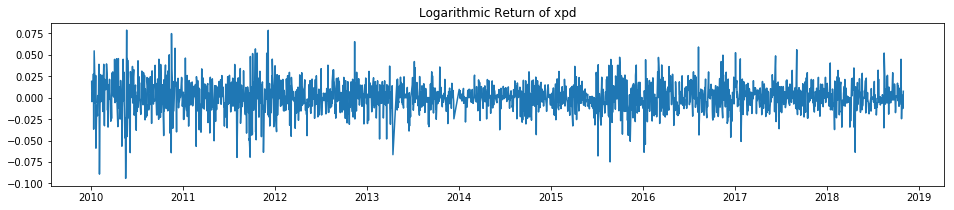

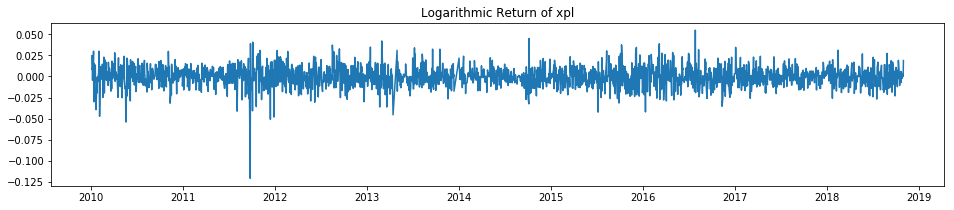

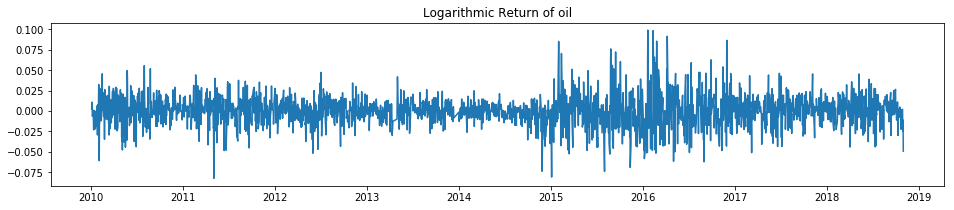

In [6]:
for i in ['xpd', 'xpl', 'oil']:
    log_returns = np.log(1 + df[i].pct_change())
    plt.figure(figsize=(16,3))
    plt.title('Logarithmic Return of {}'.format(i))
    plt.plot(log_returns)
    plt.show()

Graph 3: Histograms of Logarithmic Returns <a class="anchor" id="third-bullet"></a>

In [7]:
trace1 = go.Histogram(
    x=np.log(1 + df['xpd'].pct_change()),
    opacity=0.75, name='Palladium'
)
trace2 = go.Histogram(
    x=np.log(1 + df['xpl'].pct_change()),
    opacity=0.75, name='Platinium'
)
trace3 = go.Histogram(x=np.log(1 + df['oil'].pct_change()), opacity=0.75, name='Brent Oil')
zeta = [trace1, trace2, trace3]
layout = go.Layout(barmode='overlay') 
fig = go.Figure(data=zeta, layout=layout)

iplot(fig)

---
### Algorirthm that we implemented below
---
for $i$ = 600 to lenght{Logarithmic Returns}:
>Compute drift and standard deviation of the 600 data points

>Set $S_{i} = S_{i-1} \times e^{\mu + \sigma \times \sigma W()}$
    >* if $i$ % 30 =0:
    >* for $t$ = from 0 to 30:
        >* Set simulated prices for the next 30 days

By the algorithm above, in every 30 days we recalculated the drift and variance and estimated 30 days ahead.

In [8]:
#### D-r ve pl için sütun ismine göre isim vermeye çalışmak lazım
from scipy.stats import norm
window = 600 #Number of time points to calculate drift and variance
iterations= 1000
time_interval = 30 #Number of time points to forecast
for col in ['oil', 'xpd', 'xpl']:
    log_returns = np.log(1 + df[col].pct_change())
    d_r = [None] * (len(log_returns) +30)
    pl = [None] * (len(log_returns)+30)
    for i in range(window, len(log_returns)):
        u = log_returns[i-window:i].mean() #Mean
        var = log_returns[i-window:i].var() #Variance
        drift = u - (0.5 * var)
        stdev = log_returns[i-window:i].std() #Standard deviation
        d_r[i] = np.mean(np.exp(drift + stdev * norm.ppf(np.random.rand(time_interval, iterations))))
        pl[599] = df.loc[df.index[599], col]
        if i % 30 ==0:
            for t in range(time_interval):
                pl[t+i] = pl[t+i - 1] * d_r[i]
    globals()[str(col)+'sim'] = pl

In [9]:
#platinium_sim = pl
#palladium_sim = pl
#oil_sim = pl

In [10]:
df['Palladium Sim'] = xpdsim[:2246]

In [11]:
df['Platinium Sim'] = xplsim[:2246]
df['Oil Sim'] = oilsim[:2246]

### Results <a class="anchor" id="fourth-bullet"></a>

In [12]:
trace2 = go.Scatter(x = df.index, y=df.xpl, mode='lines', name='Platinium')
trace3 = go.Scatter(x= df.index, y=df['Platinium Sim'], mode="lines", name='Simulation')
layout = dict(title = 'Platinium Real Price VS Simulated Price',
              xaxis= dict(title= 'Time',ticklen= 5,zeroline= False) )
deta = [ trace2, trace3]
fig = dict(data = deta, layout = layout)
iplot(fig)

In [13]:
trace2 = go.Scatter(x = df.index, y=df.xpd, mode='lines', name='Palladium')
trace3 = go.Scatter(x= df.index, y=df['Palladium Sim'], mode="lines", name='Simulation')
layout = dict(title = 'Palladium Real Price VS Simulated Price',
              xaxis= dict(title= 'Time',ticklen= 5,zeroline= False)
             )
deta = [ trace2, trace3]
fig = dict(data = deta, layout = layout)
iplot(fig)

In [14]:
trace2 = go.Scatter(x = df.index, y=df.oil, mode='lines', name='Brent Oil')
trace3 = go.Scatter(x= df.index, y=df['Oil Sim'], mode="lines", name='Simulation')
layout = dict(title = 'Brent Oil Real Price VS Simulated Price',
              xaxis= dict(title= 'Time',ticklen= 5,zeroline= False)
             )
deta = [ trace2, trace3]
fig = dict(data = deta, layout = layout)
iplot(fig)